#**Aula 1: Obtendo os dados**

##**Importando os dados**

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/regressao_boosting/main/Dados/dados_automoveis.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

Marca    Modelo   Ano Tipo_combustivel  Potencia_motor  \
0         GMC  Envoy XL  2005   gasolina comum           275.0   
1  Volkswagen    Passat  2016   gasolina comum           170.0   
2       Honda   Odyssey  2016   gasolina comum           248.0   
3   Chevrolet     Cruze  2015   gasolina comum           138.0   
4       Volvo       740  1991   gasolina comum           162.0   

   Cilindros_motor Tipo_transmissao    Rodas_motrizes  Numero_portas Tamanho  \
0              6.0       automatico   tracao traseira            4.0  grande   
1              4.0       automatico  tracao dianteira            4.0   medio   
2              6.0       automatico  tracao dianteira            4.0  grande   
3              4.0           manual  tracao dianteira            4.0   medio   
4              4.0       automatico   tracao traseira            4.0   medio   

                   Estilo  Consumo_estrada_milhas  Consumo_cidade_milhas  \
0            SUV 4 portas                      18                     13   
1                    seda                      38                     25   
2  minivan de passageiros                      28                     19   
3                    seda                      36                     25   
4                    seda                      20                     17   

   Valor($)  
0     29695  
1     30495  
2     37650  
3     16170  
4      2000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10918 entries, 0 to 10917
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Marca                   10918 non-null  object 
 1   Modelo                  10918 non-null  object 
 2   Ano                     10918 non-null  int64  
 3   Tipo_combustivel        10918 non-null  object 
 4   Potencia_motor          10862 non-null  float64
 5   Cilindros_motor         10888 non-null  float64
 6   Tipo_transmissao        10918 non-null  object 
 7   Rodas_motrizes          10918 non-null  object 
 8   Numero_portas           10916 non-null  float64
 9   Tamanho                 10918 non-null  object 
 10  Estilo                  10918 non-null  object 
 11  Consumo_estrada_milhas  10918 non-null  int64  
 12  Consumo_cidade_milhas   10918 non-null  int64  
 13  Valor($)                10918 non-null  int64  
dtypes: float64(3), int64(4), object(7)
mem

##**Processando os dados**

In [ ]:
df.duplicated().sum()

709

In [ ]:
dados_limpos = df.drop_duplicates()
dados_limpos.reset_index(drop=True, inplace=True)

In [ ]:
dados_limpos.shape

(10209, 14)

In [ ]:
df_final = dados_limpos.copy()

object_columns = df_final.select_dtypes(include='object').columns
df_final[object_columns] = df_final[object_columns].astype('category')

In [ ]:
df_final.dtypes

Marca                     category
Modelo                    category
Ano                          int64
Tipo_combustivel          category
Potencia_motor             float64
Cilindros_motor            float64
Tipo_transmissao          category
Rodas_motrizes            category
Numero_portas              float64
Tamanho                   category
Estilo                    category
Consumo_estrada_milhas       int64
Consumo_cidade_milhas        int64
Valor($)                     int64
dtype: object

#**Aula 2: Utilizando o XGBoost**

##**Separando os dados em treino e teste**

In [ ]:
X = df_final.drop(['Valor($)'], axis=1)
y = df_final['Valor($)']

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=4256)

##**Realizando previsões com a API do Scikit-Learn**

In [ ]:
import xgboost as xgb

In [ ]:
xgb.__version__

'2.0.3'

In [ ]:
modelo = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True, n_estimators=100)

modelo.fit(X_treino, y_treino)
preds = modelo.predict(X_teste)

##**Obtendo métricas de desempenho**

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_teste, preds)
print(f'MSE: {mse:.2f}')

MSE: 10073066.72


In [ ]:
rmse = mean_squared_error(y_teste, preds, squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 3173.81


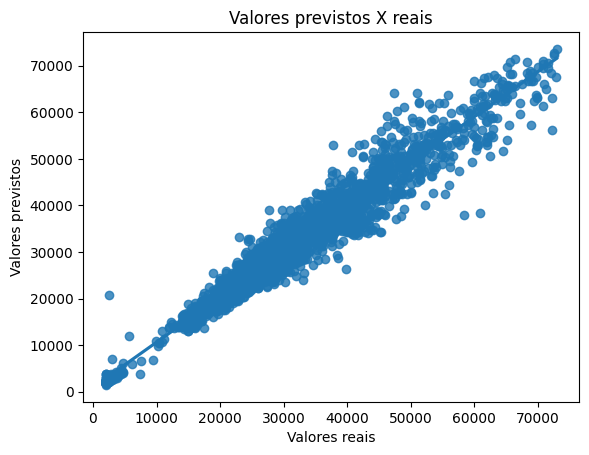

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_teste, y=preds)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores previstos X reais')
plt.show()

##**Realizando previsões com a API nativa do XGBoost**

In [ ]:
dtreino = xgb.DMatrix(X_treino, y_treino, enable_categorical=True)
dteste = xgb.DMatrix(X_teste, y_teste, enable_categorical=True)

In [ ]:
params = {'objective': 'reg:squarederror'}

modelo = xgb.train(
    params=params,
    dtrain=dtreino,
    num_boost_round=100
)

preds = modelo.predict(dteste)

In [ ]:
rmse = mean_squared_error(dteste.get_label(), preds, squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 3173.81


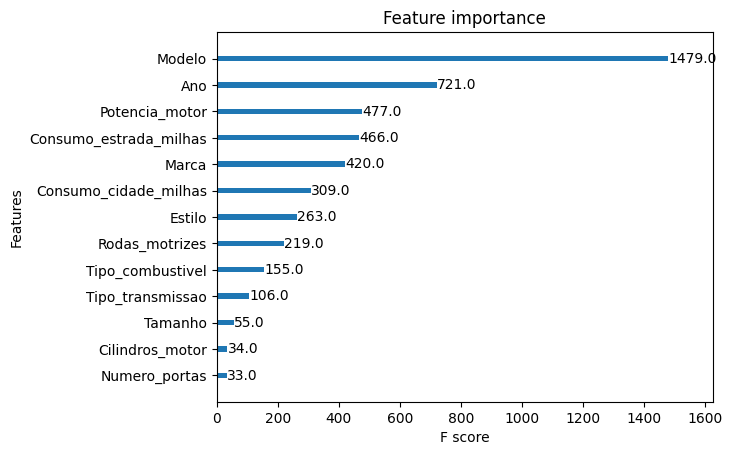

In [ ]:
xgb.plot_importance(modelo)
plt.grid(False)
plt.show()